# Housing Price Prediction

#### Import libraries

In [1]:
import numpy as np 
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#data prep & modelling
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score,  GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

#### Load data

In [2]:
data = pd.read_csv('housing_price.csv')
data.head(10)

,DATE,NASDAQCOM,gdp_per_capita,disposable_personal_income,interest_rate,unemployment_level,population,cpi,PERMIT,inflation,home_sold,privately_owned_house,labor_force_rate,houseowneship_rate,residential_construction_spending,house_price_index,median_sale_price
0,1947-01-01,NaN,15248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1947-02-01,NaN,15248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1947-03-01,NaN,15248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1947-04-01,NaN,15139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1947-05-01,NaN,15139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1947-06-01,NaN,15139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1947-07-01,NaN,15039.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1947-08-01,NaN,15039.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1947-09-01,NaN,15039.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1947-10-01,NaN,15204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Filter out last 24 years of data

In [3]:
df = data[data['DATE'] >= '2000-01-01']
df = df.reset_index(drop=True)
df.head(10)

,DATE,NASDAQCOM,gdp_per_capita,disposable_personal_income,interest_rate,unemployment_level,population,cpi,PERMIT,inflation,home_sold,privately_owned_house,labor_force_rate,houseowneship_rate,residential_construction_spending,house_price_index,median_sale_price
0,2000-01-01,4013.494000,49335.0,9799.9,5.00,5708.0,282162411.0,0.297089,1727.0,3.376857,873.0,1636.0,1.490972,67.1,NaN,100.552,163500.0
1,2000-02-01,4410.871000,49335.0,9837.9,5.24,5858.0,282162411.0,0.592417,1692.0,3.376857,856.0,1737.0,0.132849,67.1,NaN,101.339,162400.0
2,2000-03-01,4802.988261,49335.0,9864.0,5.34,5733.0,282162411.0,0.824499,1651.0,3.376857,900.0,1604.0,-0.015443,67.1,NaN,102.126,165100.0
3,2000-04-01,3863.637368,50109.0,9913.7,5.50,5481.0,282162411.0,0.058411,1597.0,3.376857,841.0,1626.0,0.222559,67.3,NaN,102.922,162600.0
4,2000-05-01,3528.416818,50109.0,9954.5,5.71,5758.0,282162411.0,0.116754,1543.0,3.376857,857.0,1575.0,-0.254289,67.3,NaN,103.678,164700.0
5,2000-06-01,3865.476818,50109.0,9982.3,6.00,5651.0,282162411.0,0.524781,1572.0,3.376857,793.0,1559.0,0.142568,67.3,NaN,104.424,160100.0
6,2000-07-01,4017.685000,50024.0,10035.9,6.00,5747.0,282162411.0,0.232019,1542.0,3.376857,887.0,1463.0,-0.219509,67.5,NaN,105.054,169000.0
7,2000-08-01,3909.596957,50024.0,10098.3,6.00,5853.0,282162411.0,0.000000,1552.0,3.376857,848.0,1541.0,0.165872,67.5,NaN,105.768,166600.0
8,2000-09-01,3875.822000,50024.0,10110.3,6.00,5625.0,282162411.0,0.520833,1570.0,3.376857,912.0,1507.0,0.002807,67.5,NaN,106.537,171500.0
9,2000-10-01,3333.824545,50190.0,10139.2,6.00,5534.0,282162411.0,0.172712,1577.0,3.376857,933.0,1549.0,0.072973,67.5,NaN,107.382,176300.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DATE                               293 non-null    object 
 1   NASDAQCOM                          293 non-null    float64
 2   gdp_per_capita                     293 non-null    float64
 3   disposable_personal_income         293 non-null    float64
 4   interest_rate                      293 non-null    float64
 5   unemployment_level                 293 non-null    float64
 6   population                         293 non-null    float64
 7   cpi                                293 non-null    float64
 8   PERMIT                             293 non-null    float64
 9   inflation                          293 non-null    float64
 10  home_sold                          293 non-null    float64
 11  privately_owned_house              293 non-null    float64

In [5]:
df.isna().sum()

DATE                                  0
NASDAQCOM                             0
gdp_per_capita                        0
disposable_personal_income            0
interest_rate                         0
unemployment_level                    0
population                            0
cpi                                   0
PERMIT                                0
inflation                             0
home_sold                             0
privately_owned_house                 0
labor_force_rate                      0
houseowneship_rate                    0
residential_construction_spending    24
house_price_index                     0
median_sale_price                     0
dtype: int64

All columns except residential_construction_spending have non-null values

In [6]:
df.describe()

,NASDAQCOM,gdp_per_capita,disposable_personal_income,interest_rate,unemployment_level,population,cpi,PERMIT,inflation,home_sold,privately_owned_house,labor_force_rate,houseowneship_rate,residential_construction_spending,house_price_index,median_sale_price
count,293.000000,293.000000,293.000000,293.000000,293.00000,2.930000e+02,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,269.000000,293.000000,293.000000
mean,5149.274485,56988.774744,13296.005802,1.938703,8864.90785,3.115080e+08,0.216412,1364.624573,2.812884,697.184300,1304.610922,0.054407,66.360751,512311.903346,179.824259,272070.307167
std,4074.079396,4992.414649,2154.024723,1.842075,3025.63971,1.637291e+07,0.388359,451.985516,2.041651,279.950815,437.032543,0.342528,1.745894,195866.621986,53.992833,75192.368630
min,1241.911739,49335.000000,9799.900000,0.250000,5481.00000,2.821624e+08,-1.915290,513.000000,-0.355546,270.000000,478.000000,-3.787035,63.100000,244399.000000,100.552000,160100.000000
25%,2194.440000,53683.000000,11702.800000,0.750000,6581.00000,2.983799e+08,-0.008581,1044.000000,1.622223,456.000000,1002.000000,-0.069519,65.100000,373352.000000,143.017000,219500.000000
50%,3136.802632,55497.000000,12893.400000,1.000000,7932.00000,3.138777e+08,0.211082,1378.000000,2.442583,641.000000,1311.000000,0.086745,66.000000,503659.000000,169.125000,249100.000000
75%,7161.772632,61093.000000,15007.200000,2.750000,10202.00000,3.268382e+08,0.481052,1691.000000,3.376857,896.000000,1625.000000,0.218397,67.900000,599178.000000,200.662000,318300.000000
max,16420.600000,67702.000000,20422.600000,6.250000,23090.00000,3.332876e+08,1.373608,2263.000000,8.002800,1389.000000,2273.000000,1.490972,69.400000,979044.000000,316.576000,460300.000000


<AxesSubplot:>

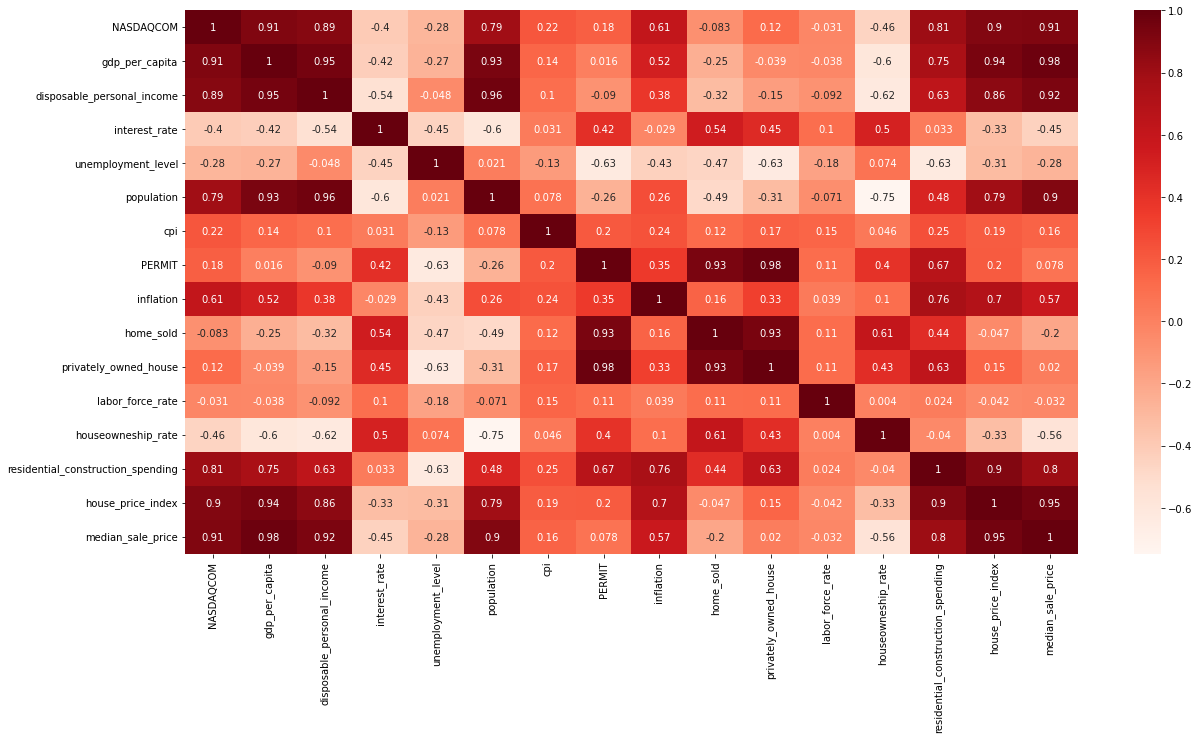

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='Reds')

In [8]:
columns_to_plot = df.columns[1:-1]
columns_to_plot

Index(['NASDAQCOM', 'gdp_per_capita', 'disposable_personal_income',
       'interest_rate', 'unemployment_level', 'population', 'cpi', 'PERMIT',
       'inflation', 'home_sold', 'privately_owned_house', 'labor_force_rate',
       'houseowneship_rate', 'residential_construction_spending',
       'house_price_index'],
      dtype='object')

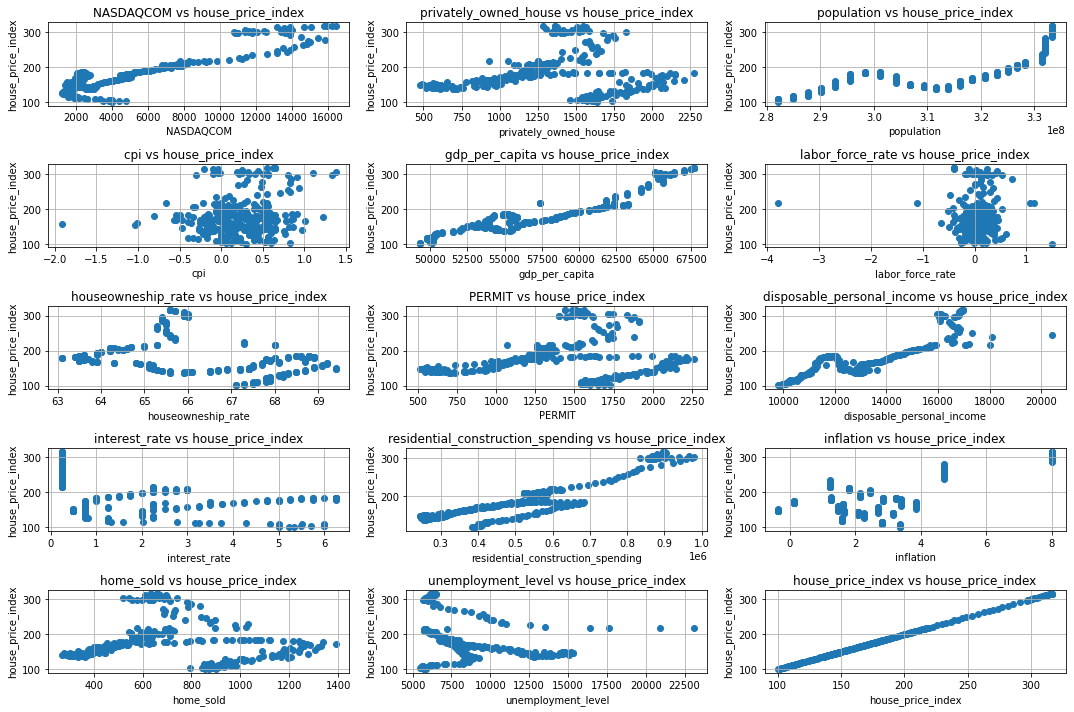

In [9]:
# Create subplots with more rows if needed (example with 2 rows and 4 columns)
fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Loop through each column and corresponding subplot axis
for i, column in enumerate(columns_to_plot):
    ax = axes[i % 5, i % 3]  # Determine the row and column for each subplot
    ax.scatter(df[column], df['house_price_index'])
    ax.set_title(f'{column} vs house_price_index')
    ax.set_xlabel(column)
    ax.set_ylabel('house_price_index')
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Correlation Analysis

### Strong Positive Correlations with house_price_index:
- gdp_per_capita (0.94)
- median_sale_price (0.95)
- disposable_personal_income (0.86)
- NASDAQCOM (0.9) 
- population (0.79)
- residential_construction_spending (0.9)
- inflation (0.7)

### Negative Correlations with house_price_index
- houseowneship_rate (-0.33)
- interest_rate (-0.33)
- unemployment_rate (-0.31)

### Weak correlation with house_price_index
- PERMIT (0.2)
- cpi (0.19)
- privately_owned_house (0.15)
- house_sold (-0.047) 
- labour_force_rate (-0.042)


Plot the data distribution

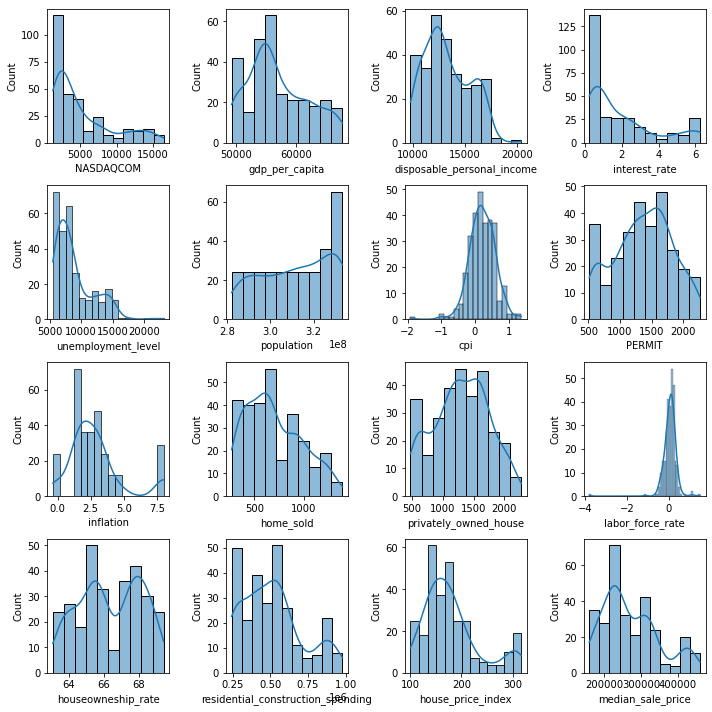

In [10]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.flatten()

for i in range(1, 17):
    sns.histplot(df.iloc[:, i], kde=True, ax=axes[i - 1])
    
plt.tight_layout()

plt.show()

Almost all the column shows normal distribution of data, skewed but normal. So, if the data is normally distributed that StandardScaler is the best normalization method as it reduce the effect of outliers and normalised the data efficiently. 

In [11]:
standard_scaler = StandardScaler()

In [12]:
scaled_x = standard_scaler.fit_transform(df.iloc[:,1:])
df_scaled = pd.DataFrame(scaled_x)

df_scaled.columns = df.columns[1:]
df_scaled.head(5)

,NASDAQCOM,gdp_per_capita,disposable_personal_income,interest_rate,unemployment_level,population,cpi,PERMIT,inflation,home_sold,privately_owned_house,labor_force_rate,houseowneship_rate,residential_construction_spending,house_price_index,median_sale_price
0,-0.279259,-1.535704,-1.625834,1.664718,-1.045170,-1.795391,0.208093,0.803113,0.276707,0.629098,0.759568,4.201183,0.424146,NaN,-1.470712,-1.446371
1,-0.181554,-1.535704,-1.608163,1.795229,-0.995509,-1.795391,0.969847,0.725544,0.276707,0.568269,0.991068,0.229399,0.424146,NaN,-1.456111,-1.461025
2,-0.085143,-1.535704,-1.596025,1.849608,-1.036893,-1.795391,1.568467,0.634678,0.276707,0.725709,0.686222,-0.204276,0.424146,NaN,-1.441510,-1.425056
3,-0.316105,-1.380403,-1.572913,1.936615,-1.120324,-1.795391,-0.407537,0.515001,0.276707,0.514597,0.736648,0.491754,0.538896,NaN,-1.426742,-1.458361
4,-0.398527,-1.380403,-1.553939,2.050812,-1.028617,-1.795391,-0.257051,0.395324,0.276707,0.571847,0.619752,-0.902771,0.538896,NaN,-1.412716,-1.430385


## Modelling
### Split dataset

In [13]:
X = df_scaled.drop(columns=['house_price_index','residential_construction_spending'], axis=1)
y = df_scaled["house_price_index"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

### Try different model to get optimed output

#### LinearRegression Model

In [14]:
linear = LinearRegression()
linear_score = cross_val_score(linear, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
print("Mean cross-validated score (negative MSE): %.3f" %(np.mean(np.abs(linear_score))))
print("Standard deviation of cross-validated scores: %.3f" %(np.std(np.abs(linear_score))))

Mean cross-validated score (negative MSE): 0.105
Standard deviation of cross-validated scores: 0.006


##### Lasso model

In [15]:
# defining the model
lasso = Lasso(alpha=0.1)
lasso_score = cross_val_score(lasso, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
print("Mean cross-validated score : %.3f" %(np.mean(np.abs(lasso_score))))
print("Standard deviation of cross-validated scores: %.3f" %(np.std(np.abs(lasso_score))))

Mean cross-validated score : 0.212
Standard deviation of cross-validated scores: 0.010


#### Ridge model

In [16]:
ridge = Ridge(alpha=0.1)
ridge_score = cross_val_score(ridge, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
print("Mean cross-validated score : %.3f" %(np.mean(np.abs(ridge_score))))
print("Standard deviation of cross-validated scores: %.3f" %(np.std(np.abs(ridge_score))))

Mean cross-validated score : 0.105
Standard deviation of cross-validated scores: 0.006


#### BayesianRidge model

In [17]:
bayesianRidge = BayesianRidge()
bayesianRidge_score = cross_val_score(bayesianRidge, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
print("Mean cross-validated score : %.3f" %(np.mean(np.abs(bayesianRidge_score))))
print("Standard deviation of cross-validated scores: %.3f" %(np.std(np.abs(bayesianRidge_score))))

Mean cross-validated score : 0.105
Standard deviation of cross-validated scores: 0.005


#### ElasticNet Model

In [18]:
elasticNet = ElasticNet()
elasticNet_score = cross_val_score(elasticNet, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
print("Mean cross-validated score : %.3f" %(np.mean(np.abs(elasticNet_score))))
print("Standard deviation of cross-validated scores: %.3f" %(np.std(np.abs(elasticNet_score))))

Mean cross-validated score : 0.487
Standard deviation of cross-validated scores: 0.079


Lesser the Mean cross-validated score better the model performs therefore, on comparing all the model **Linear, Ridge and BayesianRidge** model outperform

#### Test Models

Best parameters found:  {'poly__degree': 1, 'regressor__fit_intercept': True}
Best cross-validation score:  0.016568243785642763
Mean Squared Error: 0.013270702858852141
R^2 Score: 0.9876737882371361


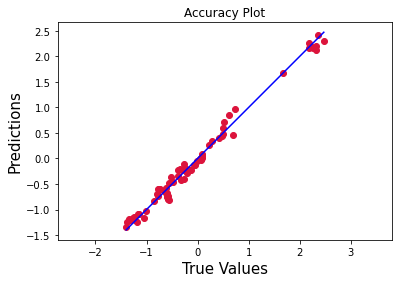

In [19]:
#Linear Regression Model

# Create a pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),       # Add PolynomialFeatures for flexibility
    ('regressor', LinearRegression())     # LinearRegression model
])

# Define the parameter grid
param_grid = {
    'poly__degree': [1, 2, 3],
    'regressor__fit_intercept': [True, False]
}

# Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", -grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


# Plotting both the curves simultaneously
plt.scatter(y_test, y_pred, c='crimson')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("Accuracy Plot")
plt.axis('equal')
plt.show()

Best parameters found:  {'regressor__alpha_1': 1e-06, 'regressor__alpha_2': 0.0001, 'regressor__lambda_1': 0.0001, 'regressor__lambda_2': 1e-06}
Best cross-validation score:  0.01602342417630471
Mean Squared Error: 0.013493256425826893
R^2 Score: 0.9874670740619874


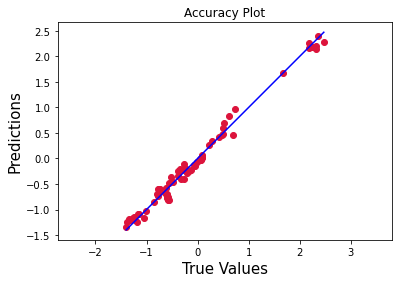

In [20]:
# BayesianRidge Regression Model

# Create a pipeline
pipeline = Pipeline([
    ('regressor', BayesianRidge()) # Bayesian Ridge regression model
])

# Define the parameter grid
param_grid = {
    'regressor__alpha_1': [1e-6, 1e-5, 1e-4],       # Hyperparameter for the prior on the precision of the weights
    'regressor__alpha_2': [1e-6, 1e-5, 1e-4],       # Hyperparameter for the prior on the noise precision
    'regressor__lambda_1': [1e-6, 1e-5, 1e-4],      # Hyperparameter for the prior on the weights
    'regressor__lambda_2': [1e-6, 1e-5, 1e-4]       # Hyperparameter for the prior on the noise precision
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", -grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plotting both the curves simultaneously
plt.scatter(y_test, y_pred, c='crimson')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("Accuracy Plot")
plt.axis('equal')
plt.show()


In [21]:
result = sm.OLS(y_train, X_train).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:      house_price_index   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1109.
Date:                Sat, 25 May 2024   Prob (F-statistic):                   1.13e-184
Time:                        13:58:18   Log-Likelihood:                          167.44
No. Observations:                 219   AIC:                                     -306.9
Df Residuals:                     205   BIC:                                     -259.4
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

- R-squared (uncentered): 0.986 indicates a very strong relationship between the independent and dependent variables, suggesting that the model provides an excellent fit to the data and that the independent variables explain a large proportion of the variability in the dependent variable.

- F-statistic: 923.4 indicates that the regression model is statistically significant, suggesting that the included predictors collectively have an effect on the dependent variable. It provides valuable information about the overall fit and usefulness of the regression model in explaining the variability in the dependent variable.

- The p-value of variables **NASDAQCOM, gdp_per_capita, houseownership_rate and median_sale_price** is less than 0.05 or 5% significance level that means there is strong evidence to reject the null hypothesis that the coefficient is zero, suggesting that these variables has a significant effect on the dependent variable i,e house_price_index.